In [19]:
from tensorflow.keras.callbacks import EarlyStopping
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm
import tensorflow as tf
import pandas as pd
from keras.utils import load_img

## Data Preparation

In [56]:
import multiprocessing as mp
from utils import load_data_mp

csv_file = os.path.join('y_train.csv')
files = [file for file in os.listdir("./Color/") \
         if os.path.splitext(file)[1] != '.csv']
# with tf.device("/device:GPU:0"):
#   images, labels = load_data(path, csv_file)
pool = mp.Pool(8)
items = list(tqdm(pool.imap(load_data_mp, files)))


8279it [00:19, 423.17it/s]


array([[<Axes: title={'center': 'target'}>]], dtype=object)

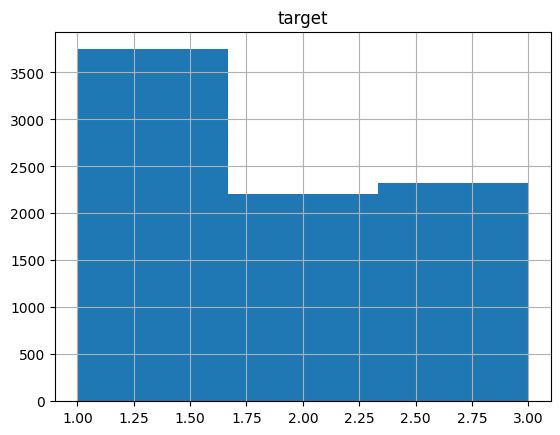

In [24]:
csv_file = pd.read_csv('y_train.csv')
csv_file.hist(column="target", bins=3)

In [57]:
images = np.asarray([item[0] for item in items])
labels = np.asarray([item[1] for item in items])

In [58]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=42)

## Training Ist and IInd iteration

In [28]:
EARLYSTOP = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)

In [29]:
def data_aug(X_train, X_test, y_train, y_test, train_batch_size, test_batch_size):
    train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1.0/255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
    test_datagen = ImageDataGenerator(rescale=1.0/255)
    train_batch = train_datagen.flow(X_train,y_train,batch_size=train_batch_size)
    test_batch = test_datagen.flow(X_test,y_test,batch_size=test_batch_size)
    return (train_batch,test_batch)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 additionalD1 (Conv2D)       (None, 7, 7, 32)          65568     
                                                                 
 additionalDP (Dropout)      (None, 7, 7, 32)          0         
                                                                 
 additionalD2 (Flatten)      (None, 1568)              0         
                                                                 
 additionalFC2 (Dense)       (None, 64)                100416    
                                                                 
 additionalSF1 (Dense)       (None, 3)                 195       
                                                                 
Total params: 23,730,979
Trainable params: 22,453,283
No

InvalidArgumentError: Graph execution error:

Detected at node 'sequential/additionalD2/Reshape' defined at (most recent call last):
    File "c:\Python38\lib\runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Python38\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\ffili\AppData\Roaming\Python\Python38\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\ffili\AppData\Roaming\Python\Python38\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\ffili\AppData\Roaming\Python\Python38\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "C:\Users\ffili\AppData\Roaming\Python\Python38\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Python38\lib\asyncio\base_events.py", line 570, in run_forever
      self._run_once()
    File "c:\Python38\lib\asyncio\base_events.py", line 1859, in _run_once
      handle._run()
    File "c:\Python38\lib\asyncio\events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\ffili\AppData\Roaming\Python\Python38\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "C:\Users\ffili\AppData\Roaming\Python\Python38\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "C:\Users\ffili\AppData\Roaming\Python\Python38\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "C:\Users\ffili\AppData\Roaming\Python\Python38\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\ffili\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\ffili\AppData\Roaming\Python\Python38\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\ffili\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py", line 3006, in run_cell
      result = self._run_cell(
    File "C:\Users\ffili\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py", line 3061, in _run_cell
      result = runner(coro)
    File "C:\Users\ffili\AppData\Roaming\Python\Python38\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\ffili\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py", line 3266, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\ffili\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py", line 3445, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\ffili\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\ffili\AppData\Local\Temp\ipykernel_41240\489021130.py", line 39, in <module>
      history = resnet.fit(train_batch,
    File "c:\Python38\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Python38\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Python38\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "c:\Python38\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Python38\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "c:\Python38\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "c:\Python38\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Python38\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Python38\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Python38\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Python38\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Python38\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Python38\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Python38\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Python38\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Python38\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Python38\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Python38\lib\site-packages\keras\layers\reshaping\flatten.py", line 104, in call
      return tf.reshape(inputs, flattened_shape)
Node: 'sequential/additionalD2/Reshape'
Input to reshape is a tensor with 73728 values, but the requested shape requires a multiple of 1568
	 [[{{node sequential/additionalD2/Reshape}}]] [Op:__inference_train_function_22292]

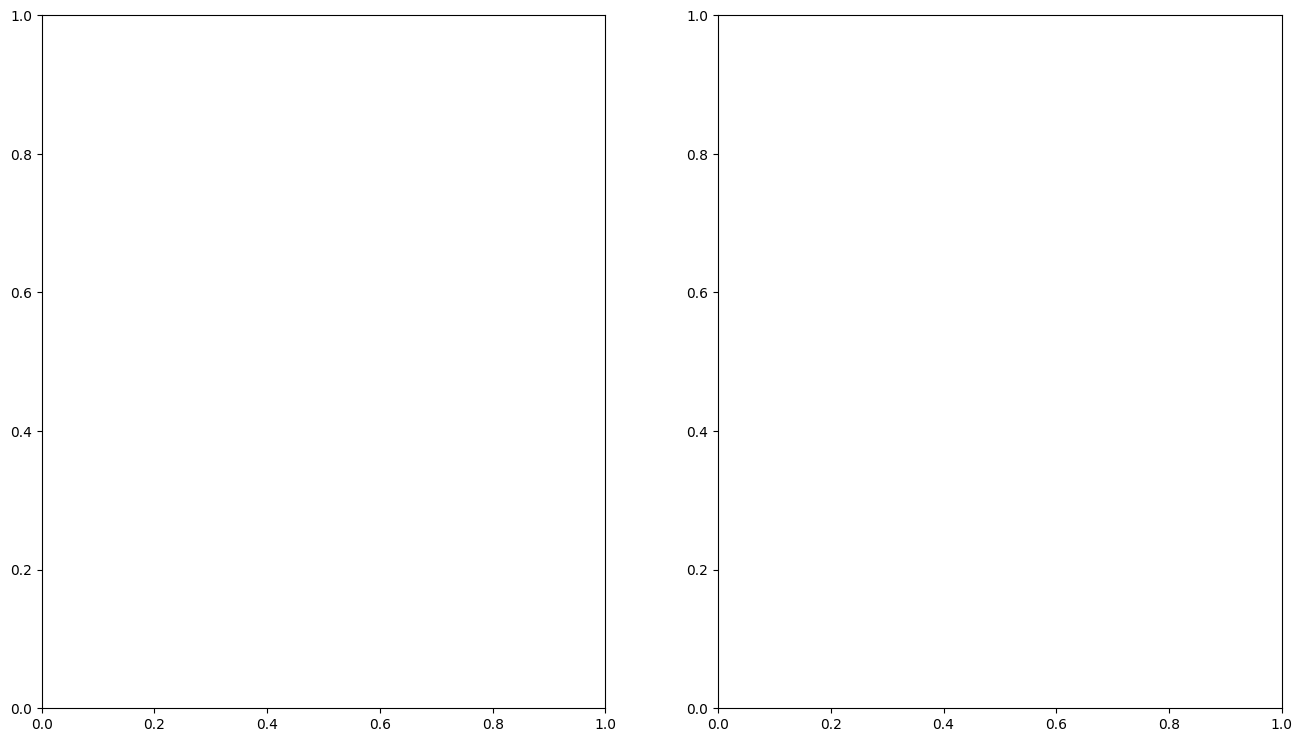

In [31]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, decay=1e-6)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fig, (fig1, fig2) = plt.subplots(1, 2, figsize=(16, 9))
fold = 1

for train, val in kfold.split(X_train, y_train):
    
    X_val = X_train[val].astype('float32')
    X_train_f = X_train[train].astype('float32')
    y_val = y_train[val]
    y_train_f = y_train[train]
    
    train_batch, val_batch = data_aug(X_train_f, X_val, y_train_f, y_val, 64, 64)


    base_model = tf.keras.applications.ResNet50V2(
                                        include_top=False,
                                        weights="imagenet",
                                        input_shape=(224, 224, 3),
                                        classifier_activation="relu",
                                    )
    for layer in base_model.layers[:80]: 
        layer.trainable = False
    resnet = tf.keras.models.Sequential([
                                base_model,
                                tf.keras.layers.Conv2D(32, (1, 1), activation="relu", name="additionalD1"),
                                tf.keras.layers.Dropout(0.25, name="additionalDP"),
                                tf.keras.layers.Flatten(name="additionalD2"),
                                tf.keras.layers.Dense(64, activation="relu", name="additionalFC2"),
                                tf.keras.layers.Dense(3, activation="softmax", name="additionalSF1")
                            ])
    resnet.summary()
    resnet.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics='accuracy')

    callbacks = [EARLYSTOP]
    print(f"Training started fold - { fold }")
    with tf.device("/GPU:0"):
        history = resnet.fit(train_batch,
                            batch_size=64,
                            epochs=100,
                            verbose=1,
                            callbacks=callbacks,
                            validation_data=val_batch,
                            )
    print(f"Training ended for fold: { fold }")
    resnet.save(f"./outputs/model/resnet_model-{ fold }")
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    fig1.plot(acc, label=f"training acc fold-{ fold }")
    fig1.plot(val_acc, label=f"val acc-{ fold }")
    fig1.set_title(f"Training and validation accuracy per fold")
    fig1.legend()

    fig2.plot(loss, label=f"loss fold-{ fold }")
    fig2.plot(val_loss, label=f"val loss-{ fold }")
    fig2.set_title(f"Training and validation loss per fold")
    fig2.legend()

    fold_matrice = pd.DataFrame(np.transpose([acc, val_acc, loss, val_loss]))
    matrices = matrices.append(fold_matrice)
    
    fold += 1

matrices.columns=['accuracy', 'val_accuracy', 'loss', 'val_loss']
matrices.index.name = 'epochs'
plt.show()

In [59]:
def evaluate_model(model, test_batches, batch_size):
    """
        Evaluate a trained model.
    """
    # Evaluate model
    predicted_values = model.predict(x = test_batches["X_test"] / 255, batch_size=batch_size)
    predicted_values = np.argmax(predicted_values, axis=1)
    true_values = test_batches["y_test"]
    true_values = np.argmax(true_values, axis=1)

    cm = confusion_matrix(true_values, predicted_values)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)

    return cm, disp

In [60]:
mean_matrices = matrices.groupby('epochs').mean()

fig, (fig1, fig2) = plt.subplots(1, 2)
fig1.plot(mean_matrices['accuracy'], label=f"training acc")
fig1.plot(mean_matrices['val_accuracy'], label=f"val acc")
fig1.set_title("Training and validation accuracy")
fig1.legend()

fig2.plot(mean_matrices['loss'], label=f"loss")
fig2.plot(mean_matrices['val_loss'], label=f"val loss")
fig2.set_title("Training and validation loss")
fig2.legend()

fig.savefig(os.path.join('./outputs/', 'learning_curves.png'))

cm, disp = evaluate_model(resnet, {'X_test': X_test, 'y_test': y_test}, 64)
disp.plot()

NameError: name 'matrices' is not defined

## Hyperparameter tuning

In [61]:
import tensorflow as tf
from keras import layers
from keras.applications import ResNet50V2
from keras.optimizers import Adam
import keras_tuner as kt
import keras

In [62]:
def base_model_rn():

    base_model = tf.keras.applications.ResNet50V2(
                                        include_top=False,
                                        weights="imagenet",
                                        input_shape=(224, 224, 3),
                                        classifier_activation="relu",
                                    )
    
    return base_model

In [67]:
def build_model(hp):

    base_model = base_model_rn()

    for layer in base_model.layers[:hp.Int('no_freezed_layers', min_value=0, max_value=20, step=1)]:
        layer.trainable = False

    x = base_model.output

    for i in range(hp.Int('no_customized_layers', 1, 3)):
        
        if hp.Choice(f'layer_type_{i}', ['dense', 'conv2d']) == 'dense':
            x = layers.Flatten()(x)
            x = layers.Dense(hp.Int(f'no_dense_units_{i}', min_value=32, max_value=512, step=32))(x)
            x = layers.Dropout(hp.Float(f'dropout_pct_dense_{i}', min_value=0.1, max_value=0.5, step=1))(x)
        
        else:
            x = layers.Conv2D(hp.Int(f'no_conv_filters_{i}', min_value=32, max_value=256, step=32),
                              hp.Int(f'kernel_size_{i}', min_value=3, max_value=7, step=2))(x)
            x = layers.BatchNormalization()(x)
            x = layers.MaxPooling2D(hp.Int(f'pool_size_{i}', min_value=2, max_value=4, step=1))(x)
            x = layers.Dropout(hp.Float(f'dropout_pct_conv_{i}', min_value=0.1, max_value=0.5, step=0.1))(x)
    
    output = layers.Dense(3, activation='softmax')(x)

    model = keras.models.Model(inputs=base_model.input, outputs=output)

    optim = Adam(hp.Float('learning_rate', min_value=1e-4, max_value=0.001, sampling='log'))
    model.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [68]:
tuner = kt.RandomSearch(build_model,
                        objective='val_accuracy',
                        max_trials=7,
                        seed=42,
                        directory='tuner_classes',
                        project_name='hp_tuning_mlf')

INFO:tensorflow:Reloading Tuner from tuner_classes\hp_tuning_mlf\tuner0.json


In [65]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
tuner.search(X_train, y_train,
             epochs=20,
             batch_size=64,
             validation_data=(X_val, y_val))

In [8]:
test_path = "./Test/Color/"
print(len(os.listdir(test_path)))

3562


## Evaluate results

In [70]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras.models import load_model
model = load_model('best_hps_model.h5')

y_pred = model.predict(X_test, verbose=1)
y_pred = np.argmax(y_pred, axis=1)

26/26 [==============================] - 28s 1s/step


In [71]:
y_test = np.argmax(y_test, axis=1)

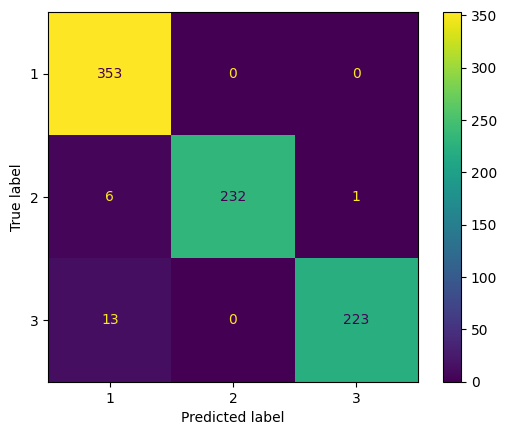

In [74]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['1', '2', '3'])
disp.plot()

In [81]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score

f1_res = f1_score(y_test, y_pred, average='macro')
acc = accuracy_score(y_test, y_pred)

In [83]:
print(f1_res, acc)

0.9761654416952883 0.9758454106280193


## Kaggle preprocessing

In [40]:
import multiprocessing as mp
from utils import load_image
# images = np.empty(shape=(len(os.listdir(test_path)), 224, 224, 3))

# for image_path in tqdm(os.listdir(test_path)):
#     image = load_img(os.path.join(test_path, image_path))
#     image_arr = np.asarray(image)
#     np.append(images, image_arr)
files = [os.path.join(test_path, f"img_{i}.png") for i in range(3549)]
pool = mp.Pool(8)
items = list(tqdm(pool.imap(load_image, files)))















































































3549it [00:09, 364.67it/s]


In [42]:
images = np.asarray(items)

In [43]:
images.shape

(3549, 224, 224, 3)

In [2]:
from keras.models import load_model

model = load_model(r"./best_hps_model.h5")


In [60]:
import pandas as pd
y_pred = model.predict(images, verbose=1)
y_pred = np.argmax(y_pred, axis=1)
ids = np.linspace(0, y_pred.shape[0])

111/111 [==============================] - 137s 1s/step


In [61]:
ids = range(y_pred.shape[0])

In [62]:
mapping_file = {
    0: "1",
    1: "2",
    2: "3"
}

In [63]:
df = pd.DataFrame(columns=["id", "target"], dtype="uint16")
df["id"] = ids
df["target"] = y_pred

In [64]:
df["target"] = df["target"].map(mapping_file)

In [65]:
df["target"].unique()

array(['2', '1', '3'], dtype=object)

In [66]:
df.to_csv("./test_II.csv", index=False)

In [68]:
model.layers[0:191]

In [79]:
!winget install graphviz

In [7]:
from keras.models import Model
model_inp = model.layers[191].input
# model_out = model.layers[-1]
model_ed = Model(inputs=model_inp, outputs=model.output)

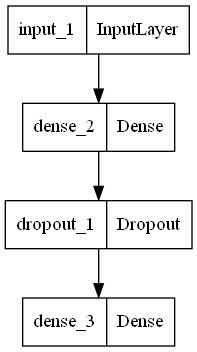

In [8]:
from keras.utils import plot_model

plot_model(model_ed, to_file="./model.png")